# First import the data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = './datasets/bme.csv'

data = pd.read_csv(file)

Text(0.5, 1.0, 'Close Price After Each Day')

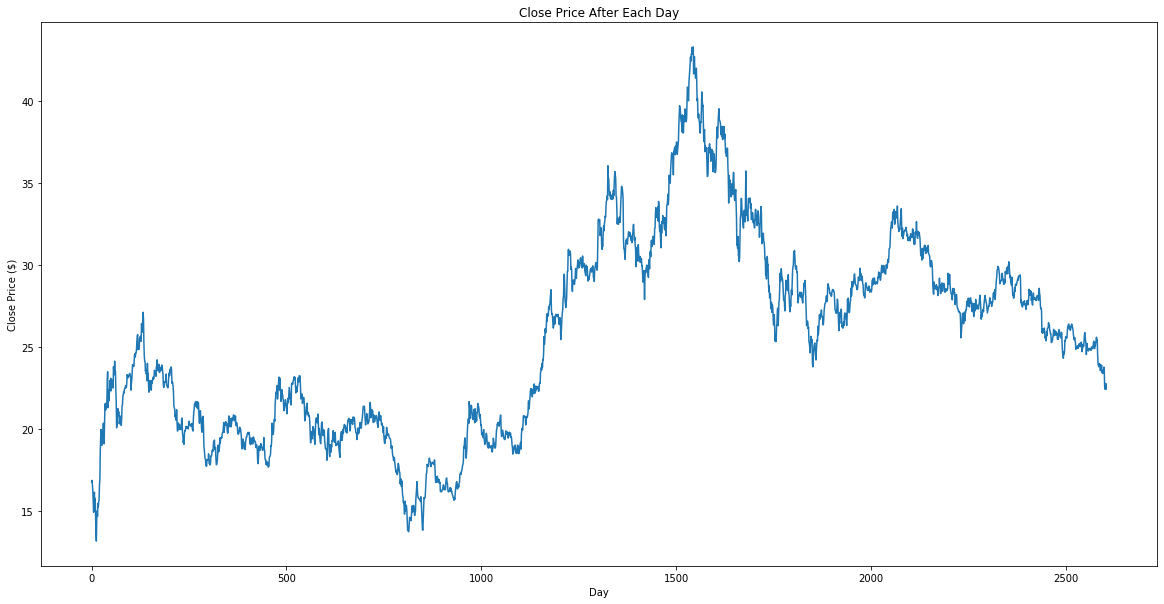

In [21]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(data['Close'])), data['Close'])
plt.ylabel("Close Price ($)")
plt.xlabel("Day")
plt.title("Close Price After Each Day")

## Summary Statistics

In [22]:
data['Close'].describe()

count    2605.000000
mean       25.528933
std         5.981579
min        13.170000
25%        20.260000
50%        25.745000
75%        29.495000
max        43.300000
Name: Close, dtype: float64

## Validation Step

In [52]:
training_set_percent = .1
training_set_size = int(training_set_percent * len(data['Close']))
training_set = data["Close"][:training_set_size] #[0,n)
test_set = data["Close"][training_set_size:]
print("Number of training days = ", len(training_set))
print("Number of test days = ", len(test_set))

Number of training days =  260
Number of test days =  2345


## Training

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
reg = RandomForestRegressor(max_depth=50, n_estimators=100)
days = np.arange(0, len(training_set)).reshape(-1,1)
reg.fit(days, training_set)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Prediction

In [55]:
low = 1500
high = 2000
prediction = reg.predict(np.arange(low, high).reshape(-1,1))
print(reg.decision_path(np.asarray(2000).reshape(-1,1)))
print("predicted is ", prediction)
print("actual is ", data["Close"][low:high])


(<1x32564 sparse matrix of type '<class 'numpy.int64'>'
	with 755 stored elements in Compressed Sparse Row format>, array([    0,   323,   636,   965,  1290,  1609,  1930,  2261,  2580,
        2885,  3210,  3519,  3832,  4139,  4478,  4815,  5136,  5455,
        5786,  6109,  6450,  6787,  7120,  7445,  7778,  8109,  8420,
        8735,  9064,  9391,  9722, 10059, 10410, 10731, 11060, 11385,
       11718, 12023, 12352, 12693, 13020, 13355, 13696, 14015, 14346,
       14673, 14992, 15307, 15632, 15957, 16292, 16625, 16948, 17271,
       17604, 17899, 18224, 18539, 18880, 19205, 19528, 19855, 20188,
       20517, 20850, 21177, 21506, 21831, 22176, 22513, 22840, 23151,
       23476, 23793, 24104, 24429, 24744, 25073, 25400, 25741, 26050,
       26385, 26726, 27065, 27396, 27709, 28046, 28371, 28698, 29017,
       29328, 29655, 29962, 30301, 30636, 30957, 31270, 31593, 31918,
       32235, 32564]))
predicted is  [20.0097 20.0097 20.0097 20.0097 20.0097 20.0097 20.0097 20.0097 20.0097
 20.